#### 모델과 텐서보드
- 텐서보드 기능 활용하여 학습 과정 확인

[1] 데이터 준비 및 확인

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.datasets.mnist import load_data

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

In [5]:
(X_train, y_train), (X_test, y_test) = load_data()

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

[2] 모델 생성

[2-1] 모델 설계
- 입력 데이터 형태 => rank-1, 1-Dim
- 입력층 : Flatten => input_shape=(28, 28)

                784 입력
- 은닉층 : Dense => 32, activation => relu

                32 입력
- 출력층 : Dense => 10, activation => softmax

In [17]:
# Layer를 담는 객체, 모델의 역할 (즉, 학습, 평가 ...) 수행 객체
model = Sequential(name = 'MM-MODEL')

In [18]:
# 입력층 : 2차원 데이터 => 1차원으로 변형 후 전달
model.add(Flatten(input_shape=(28, 28), name = 'InputFlat'))

In [19]:
# 은닉층 : 입력 - 784개, 출력 - 32개, 퍼셉트론(뉴런, 노드, 유닛) - 32개
model.add(Dense(32, activation='relu'))

In [20]:
# 출력층 : 입력 - 32개, 출력 - 10개 (0 ~ 9), 퍼셉트론(뉴런, 노드, 유닛) - 10개, softmax
model.add(Dense(10, activation='softmax'))

🔹모델 설계 확인

In [21]:
model.summary()

Model: "MM-MODEL"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputFlat (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [22]:
from tensorflow.keras.utils import plot_model

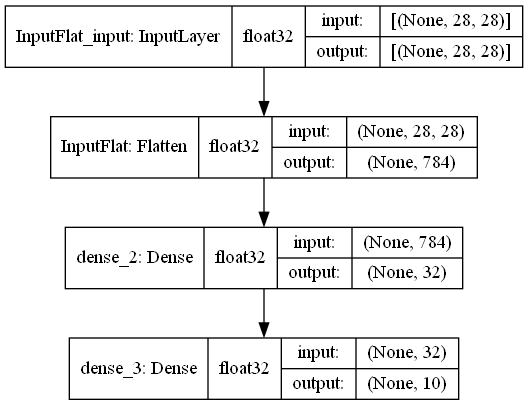

In [25]:
plot_model(model, show_dtype=True, show_shapes=True, show_layer_names=True)

[2-2] 모델 생성
- 최적화 방법 : optimizer = 최적화명 / 최적화 객체
- 손실함수 : loss = 함수명 / 객체
- 평가지표 : metrics=[]

In [27]:
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['acc'])

[3] 학습
- 학습 횟수 (처음부터 ~ 끝까지 : 1번) epochs : 10
- 학습 분량 (전체 데이터에서 나눈 분량) batch_size : (default) 32 ==> W, b 업데이트
- 검증 설정 validation_split = 비율, validation_data = (데이터, 라벨) ===> 학습 시에 검증에 대한 loss, 평가
- 자동화 기능 callbacks=[__]
    * 불필요한 학습 제어 => EarlyStop 조기종료 기능
    * 모델 및 가중치 백업 제어 => 조건에 따른 모델 저장 ModelCheckPoint
    * 학습률 제어 => 전체 학습 횟수별로 `학습률` 설정   LearningRate
    * 학습과정 시각화 ==> 텐서보드 활용 Tensorboard

[3-1] 콜백관련 작업

In [28]:
# 로그 파일을 저장하기 위한 폴더 생성
%mkdir logs

In [29]:
# 폴더 생성 확인
%ls

 D ����̺��� ����: DNA
 ���� �Ϸ� ��ȣ: 8440-6C9E

 d:\Study\EXAM_DL\DAY_0323 ���͸�

2023-03-23  ���� 10:02    <DIR>          .
2023-03-23  ���� 10:02    <DIR>          ..
2023-03-23  ���� 10:26            27,549 ex_model_tensorboard.ipynb
2023-03-23  ���� 10:42    <DIR>          logs
2023-03-23  ���� 10:28            17,702 model.png
               2�� ����              45,251 ����Ʈ
               3�� ���͸�   1,390,288,896 ����Ʈ ����


In [30]:
# 텐서보드 콜백객체 생성
tensorboard_CB = TensorBoard(log_dir='./logs')

[3-2] 학습 진행

In [32]:
EPOCHS = 10

🔹학습 진행

In [33]:
model.fit(X_train, y_train, epochs=EPOCHS, callbacks=[tensorboard_CB])

c:\ProgramData\Anaconda3\envs\DL\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3130 - acc: 0.5317
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8620 - acc: 0.7349
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5668 - acc: 0.8507
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4479 - acc: 0.8857
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3706 - acc: 0.9053
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3276 - acc: 0.9164
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3011 - acc: 0.9234
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2879 - acc: 0.9265
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2713 - acc: 0.9300
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2654 - acc: 0.9324A: 1s -


In [35]:
history = model.fit(X_train, y_train, epochs=EPOCHS,
validation_split = 0.2,
callbacks=[tensorboard_CB])

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2196 - acc: 0.9444 - val_loss: 0.2748 - val_acc: 0.9340ss: 0.2184 
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2287 - acc: 0.9424 - val_loss: 0.2948 - val_acc: 0.9352
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2174 - acc: 0.9452 - val_loss: 0.3123 - val_acc: 0.9297
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2179 - acc: 0.9454 - val_loss: 0.3095 - val_acc: 0.9357
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2157 - acc: 0.9466 - val_loss: 0.3436 - val_acc: 0.9321
Epoch 6/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2210 - acc: 0.9455 - val_loss: 0.3162 - val_acc: 0.9293 1s - l
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2133 - acc: 0.9462 - val_loss: 0.2842 - val_acc: 0.9385
Epoch 8/10
1500/1500 [======================

🔹학습 결과 시각화

In [39]:
# 학습 진행 결과 ==> fit() 결과 반환값 History 객체 사용
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df

,loss,acc,val_loss,val_acc
0,0.219621,0.944396,0.274772,0.934000
1,0.228730,0.942417,0.294752,0.935250
2,0.217363,0.945208,0.312276,0.929667
3,0.217950,0.945437,0.309465,0.935667
4,0.215705,0.946646,0.343624,0.932083
5,0.220965,0.945458,0.316221,0.929250
6,0.213296,0.946208,0.284212,0.938500
7,0.216250,0.947062,0.304604,0.938500
8,0.208269,0.947646,0.378304,0.931750
9,0.209104,0.947062,0.287018,0.938583


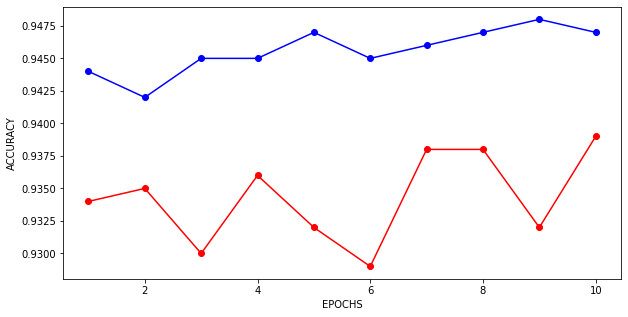

In [46]:
# 검증 데이터의 정확도와 학습 데이터의 정확도
plt.figure(figsize=(10, 5))
plt.plot(range(1, EPOCHS+1), round(history_df.acc, 3), 'ob-')
plt.plot(range(1, EPOCHS+1), round(history_df.val_acc, 3), 'or-')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.show()

🔹브라우저 텐서보드 연결

In [ ]:
# python -m tensorboard.main --logdir=./logs

[3-3] 학습 결과 확인

[4] 평가

[5] 테스트

[6] 모델 저장
- 지정한 평가지표 기준 이상인 경우 모델 저장
- 모델 저장
    * hdf5 포맷 ==> 저장명.h5
    * SavedModel 포맷 ==> 저장명

[6-1] 모델 저장

In [48]:
model.save('./mm_model.h5')

In [49]:
%ls

 D ����̺��� ����: DNA
 ���� �Ϸ� ��ȣ: 8440-6C9E

 d:\Study\EXAM_DL\DAY_0323 ���͸�

2023-03-23  ���� 10:02    <DIR>          .
2023-03-23  ���� 10:02    <DIR>          ..
2023-03-23  ���� 11:05            67,070 ex_model_tensorboard.ipynb
2023-03-23  ���� 10:42    <DIR>          logs
2023-03-23  ���� 11:16           332,464 mm_model.h5
2023-03-23  ���� 10:28            17,702 model.png
               3�� ����             417,236 ����Ʈ
               3�� ���͸�   1,389,588,480 ����Ʈ ����


In [50]:
model.save_weights('./mm_model_weights.h5')

In [51]:
%ls

 D ����̺��� ����: DNA
 ���� �Ϸ� ��ȣ: 8440-6C9E

 d:\Study\EXAM_DL\DAY_0323 ���͸�

2023-03-23  ���� 10:02    <DIR>          .
2023-03-23  ���� 10:02    <DIR>          ..
2023-03-23  ���� 11:05            67,070 ex_model_tensorboard.ipynb
2023-03-23  ���� 10:42    <DIR>          logs
2023-03-23  ���� 11:16           332,464 mm_model.h5
2023-03-23  ���� 11:17           114,536 mm_model_weights.h5
2023-03-23  ���� 10:28            17,702 model.png
               4�� ����             531,772 ����Ʈ
               3�� ���͸�   1,389,473,792 ����Ʈ ����


[6-2] 모델 읽기

In [52]:
from tensorflow.keras.models import load_model

In [62]:
mm_model = load_model('./mm_model.h5')

In [65]:
mm_model.evaluate(X_test[0].reshape(-1, 784))

1/1 [==============================] - 0s 31ms/step - loss: 0.0000e+00 - acc: 0.0000e+00


[0.0, 0.0]

In [73]:
mm_model.get_layer('dense_3').kernel

<tf.Variable 'dense_3/kernel:0' shape=(32, 10) dtype=float32, numpy=
array([[-0.03291122, -0.05874482, -0.03185597, -0.0461194 , -0.02961025,
        -0.04353568, -0.01630242, -0.06639528, -0.05850935, -0.07557848],
       [ 0.22069791,  0.30485305, -0.1284076 , -0.20331417,  0.15714754,
        -0.04791515, -0.10944206,  0.01126216, -0.35720703,  0.26519793],
       [ 0.2658643 , -0.27265102,  0.36438814, -0.18355641,  0.02944966,
         0.1467828 ,  0.02003237, -0.12549883, -0.13370925, -0.33223024],
       [-0.3825439 ,  0.0512494 , -0.03506518, -0.00247266,  0.01976822,
        -0.00914656,  0.01583952,  0.02295892,  0.00396969, -0.00340517],
       [-0.24987188, -0.11780499, -0.23158106, -0.11410543, -0.13061732,
         0.06553189,  0.27361166,  0.17817318, -0.2645552 , -0.12072902],
       [ 0.23848134,  0.18571545,  0.20456882,  0.18845262,  0.2115696 ,
         0.20174079,  0.21660899,  0.19161254,  0.17437775,  0.20429909],
       [ 0.1531417 ,  0.01261277, -0.03557692,  0